In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data


,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.00,3722.280000,70.275319,13.193760,0.31251,176.440,20.908880,0.0,0.44672,0.001574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,C0095,P0270,BAS,TER,U,43,F,False,76.340708,75.181897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,C0096,P0271,BAS,TER,R,67,M,False,436.828426,260.200509,...,765.53,346.252856,18.308317,3.402625,0.00777,22.004,4.918505,0.0,0.47207,0.011223
100,C0097,P0274,ICA,LAT,R,84,F,False,94.271201,100.528873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,C0098,P0286,MCA,TER,R,59,F,False,1022.481082,466.087643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f'{data.columns}\n {data.shape}')

characteristics = [f'{data.columns}']

Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

In [28]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']


# Subset the data to include only the specified characteristics
data_subset_with_rupture = data[characteristics_with_rupture]

# Preprocess the data (Handle missing values, encode categorical variables, scale the data)
numerical_columns_with_rupture = data_subset_with_rupture.select_dtypes(include=np.number).columns
categorical_columns_with_rupture = data_subset_with_rupture.select_dtypes(exclude=np.number).columns

imputer_numerical = SimpleImputer(strategy='mean')
data_subset_with_rupture.loc[:, numerical_columns_with_rupture] = imputer_numerical.fit_transform(data_subset_with_rupture.loc[:, numerical_columns_with_rupture])

imputer_categorical = SimpleImputer(strategy='most_frequent')
data_subset_with_rupture.loc[:, categorical_columns_with_rupture] = imputer_categorical.fit_transform(data_subset_with_rupture.loc[:, categorical_columns_with_rupture])

encoder = OneHotEncoder(drop='first')
encoded_categorical_with_rupture = encoder.fit_transform(data_subset_with_rupture[categorical_columns_with_rupture]).toarray()
encoded_categorical_columns_with_rupture = encoder.get_feature_names_out(categorical_columns_with_rupture)

label_encoder = LabelEncoder()
data_subset_with_rupture.loc[:, 'ruptureStatus'] = label_encoder.fit_transform(data_subset_with_rupture['ruptureStatus'])

data_encoded_with_rupture = pd.concat([data_subset_with_rupture.drop(columns=categorical_columns_with_rupture), 
                                       pd.DataFrame(encoded_categorical_with_rupture, columns=encoded_categorical_columns_with_rupture)], axis=1)

scaler = StandardScaler()
data_scaled_with_rupture = scaler.fit_transform(data_encoded_with_rupture)

# Apply PCA
pca = PCA(n_components=3)
principal_components_with_rupture = pca.fit_transform(data_scaled_with_rupture)
principal_df_with_rupture = pd.DataFrame(data=principal_components_with_rupture, columns=['PC1', 'PC2', 'PC3'])

# Perform K-Means clustering
kmeans_with_rupture = KMeans(n_clusters=3, random_state=42)
clusters_with_rupture = kmeans_with_rupture.fit_predict(data_scaled_with_rupture)

# Add the cluster assignments and PCA components to the data
data_encoded_with_rupture['Cluster'] = clusters_with_rupture
principal_df_with_rupture['Cluster'] = clusters_with_rupture
data_encoded_with_rupture['ruptureStatus'] = data_subset_with_rupture['ruptureStatus']

# Calculate the proportion of ruptured aneurysms within each cluster
rupture_proportions = data_encoded_with_rupture.groupby('Cluster')['ruptureStatus'].mean()

# Calculate summary statistics for both ruptured and unruptured aneurysms within each cluster
cluster_summary_with_rupture = data_encoded_with_rupture.groupby(['Cluster', 'ruptureStatus']).agg(['mean', 'median', 'std'])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:

# Save the updated cluster summary to an Excel file
cluster_summary_with_rupture.to_excel("cluster_summary_with_rupture_updated.xlsx")

# Provide the path to the Excel file
excel_file_path_with_rupture_updated = "cluster_summary_with_rupture_updated.xlsx"
excel_file_path_with_rupture_updated

'cluster_summary_with_rupture_updated.xlsx'

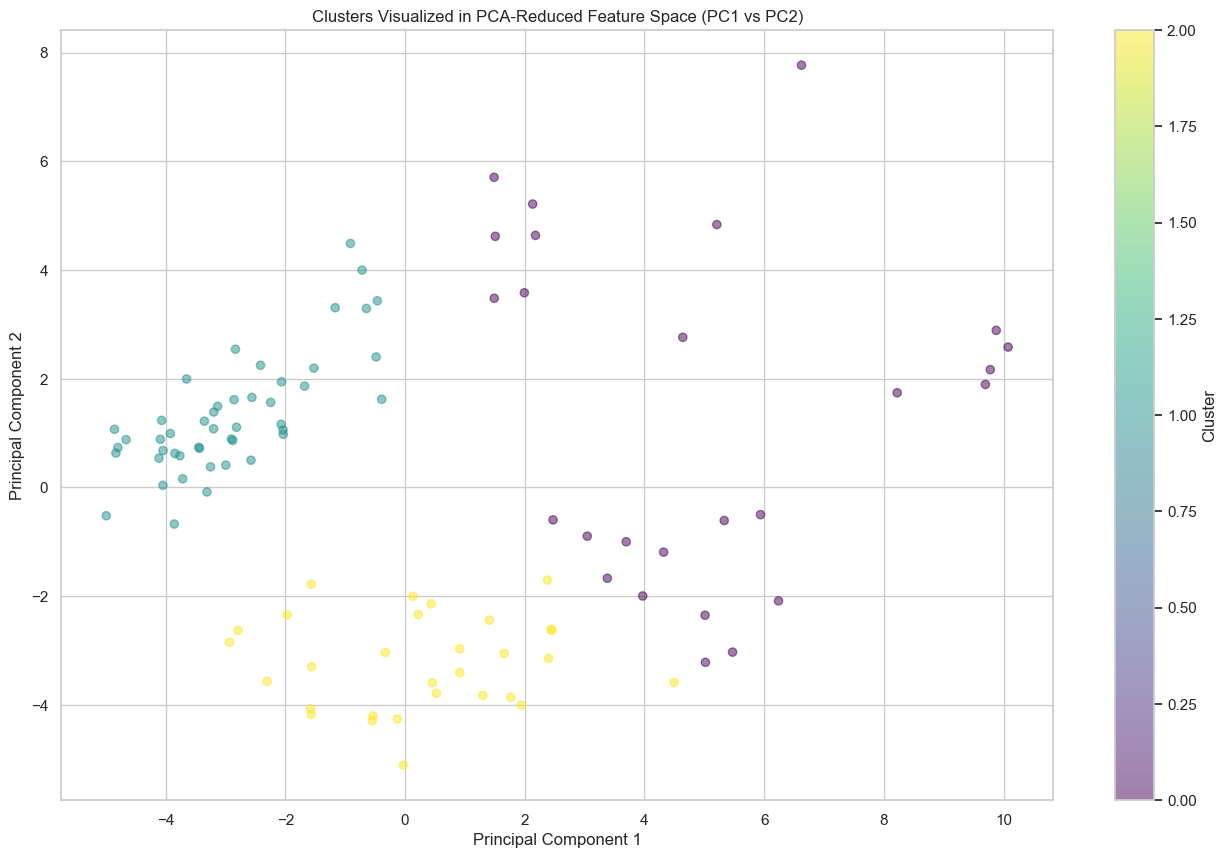

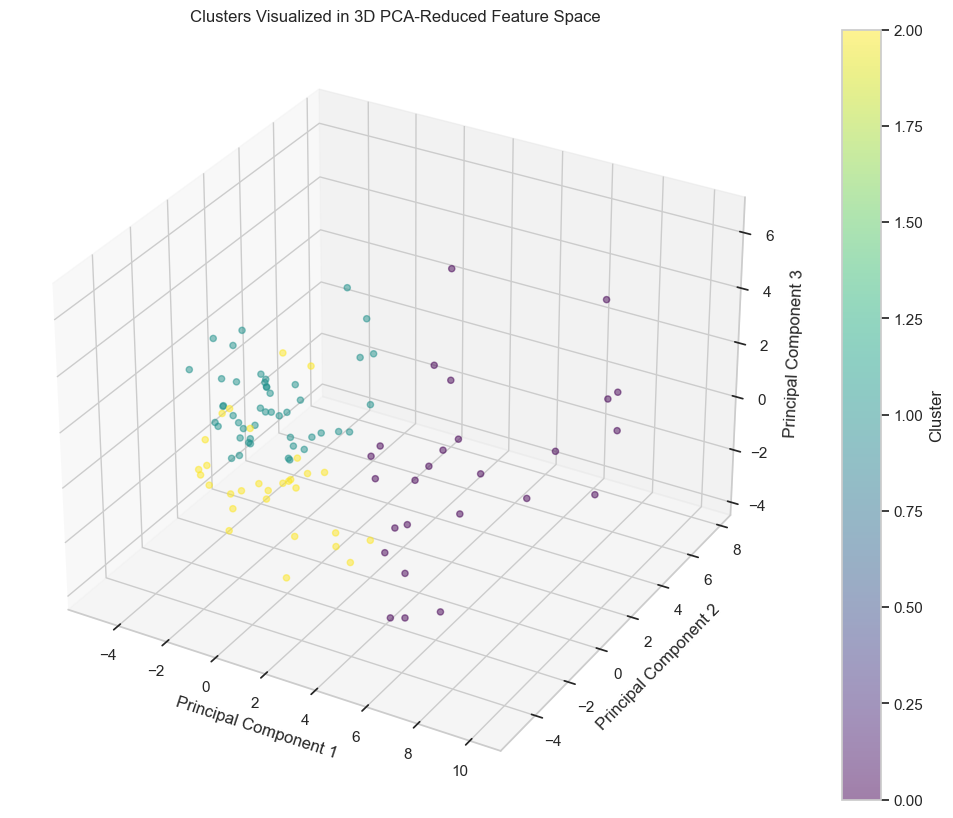

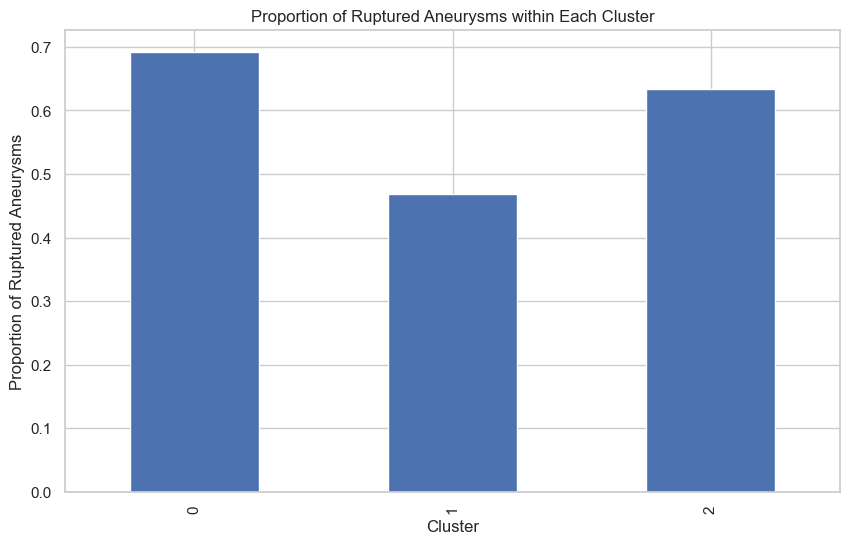

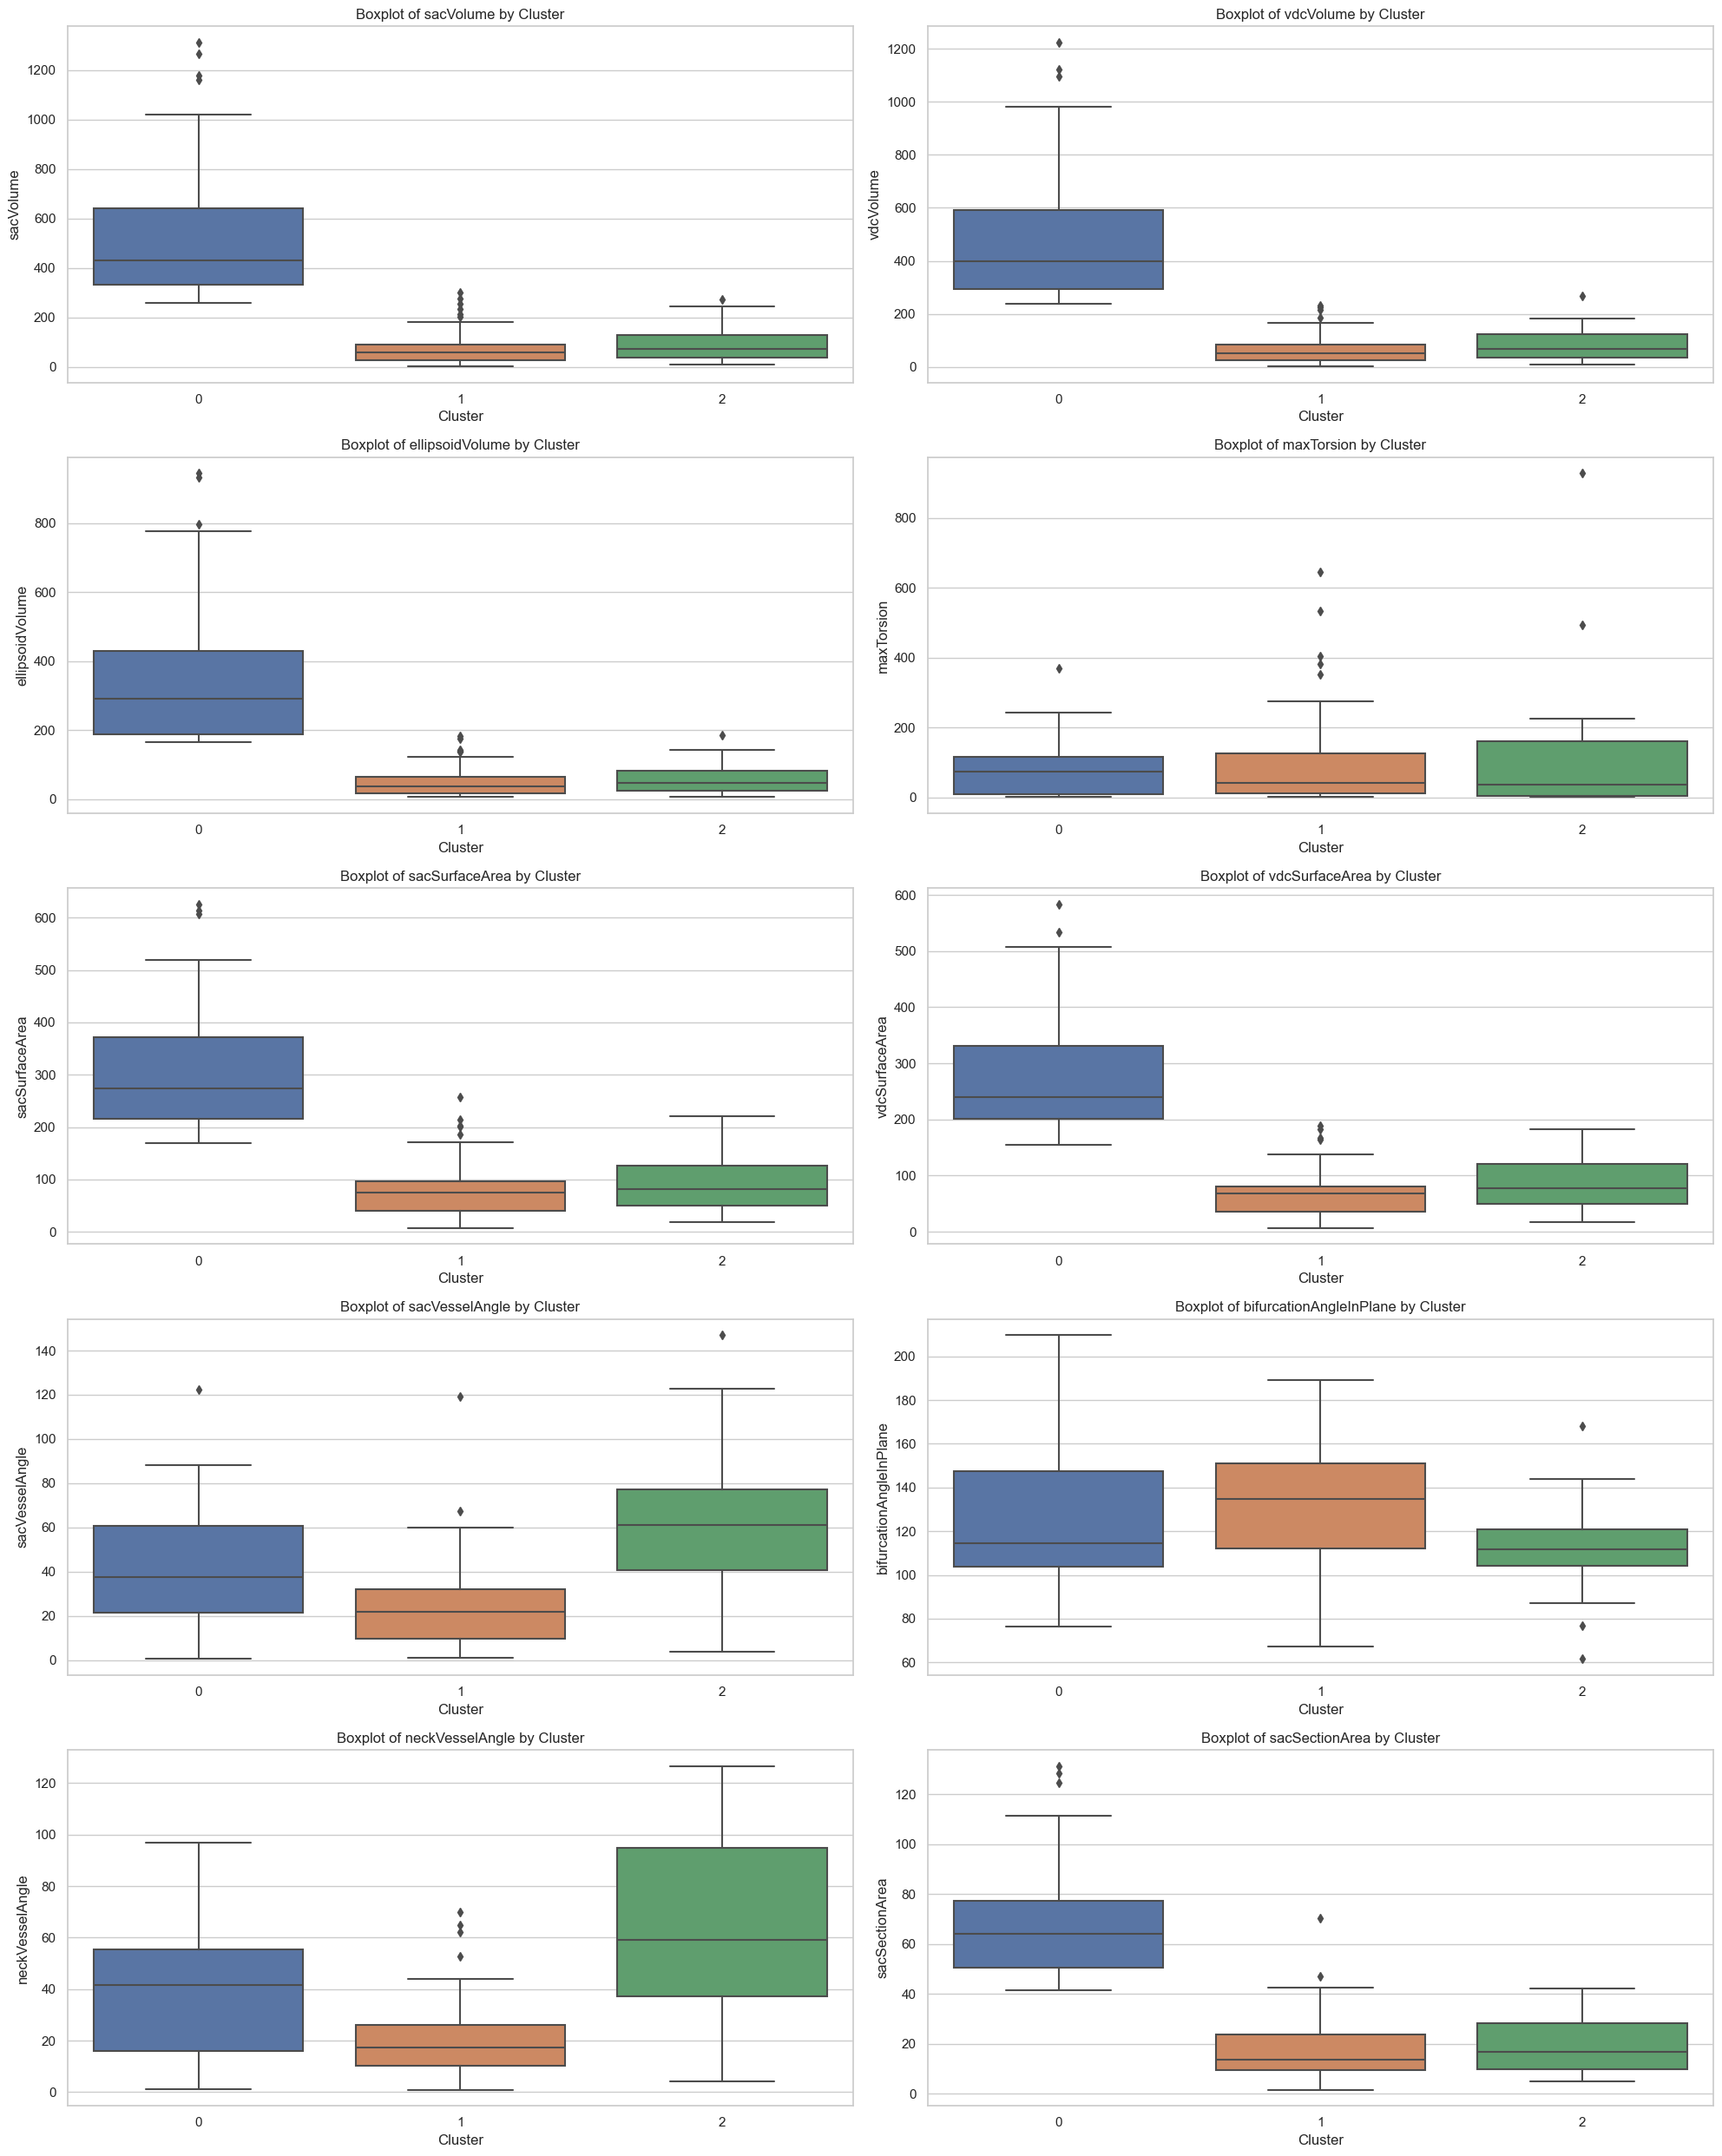

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: u

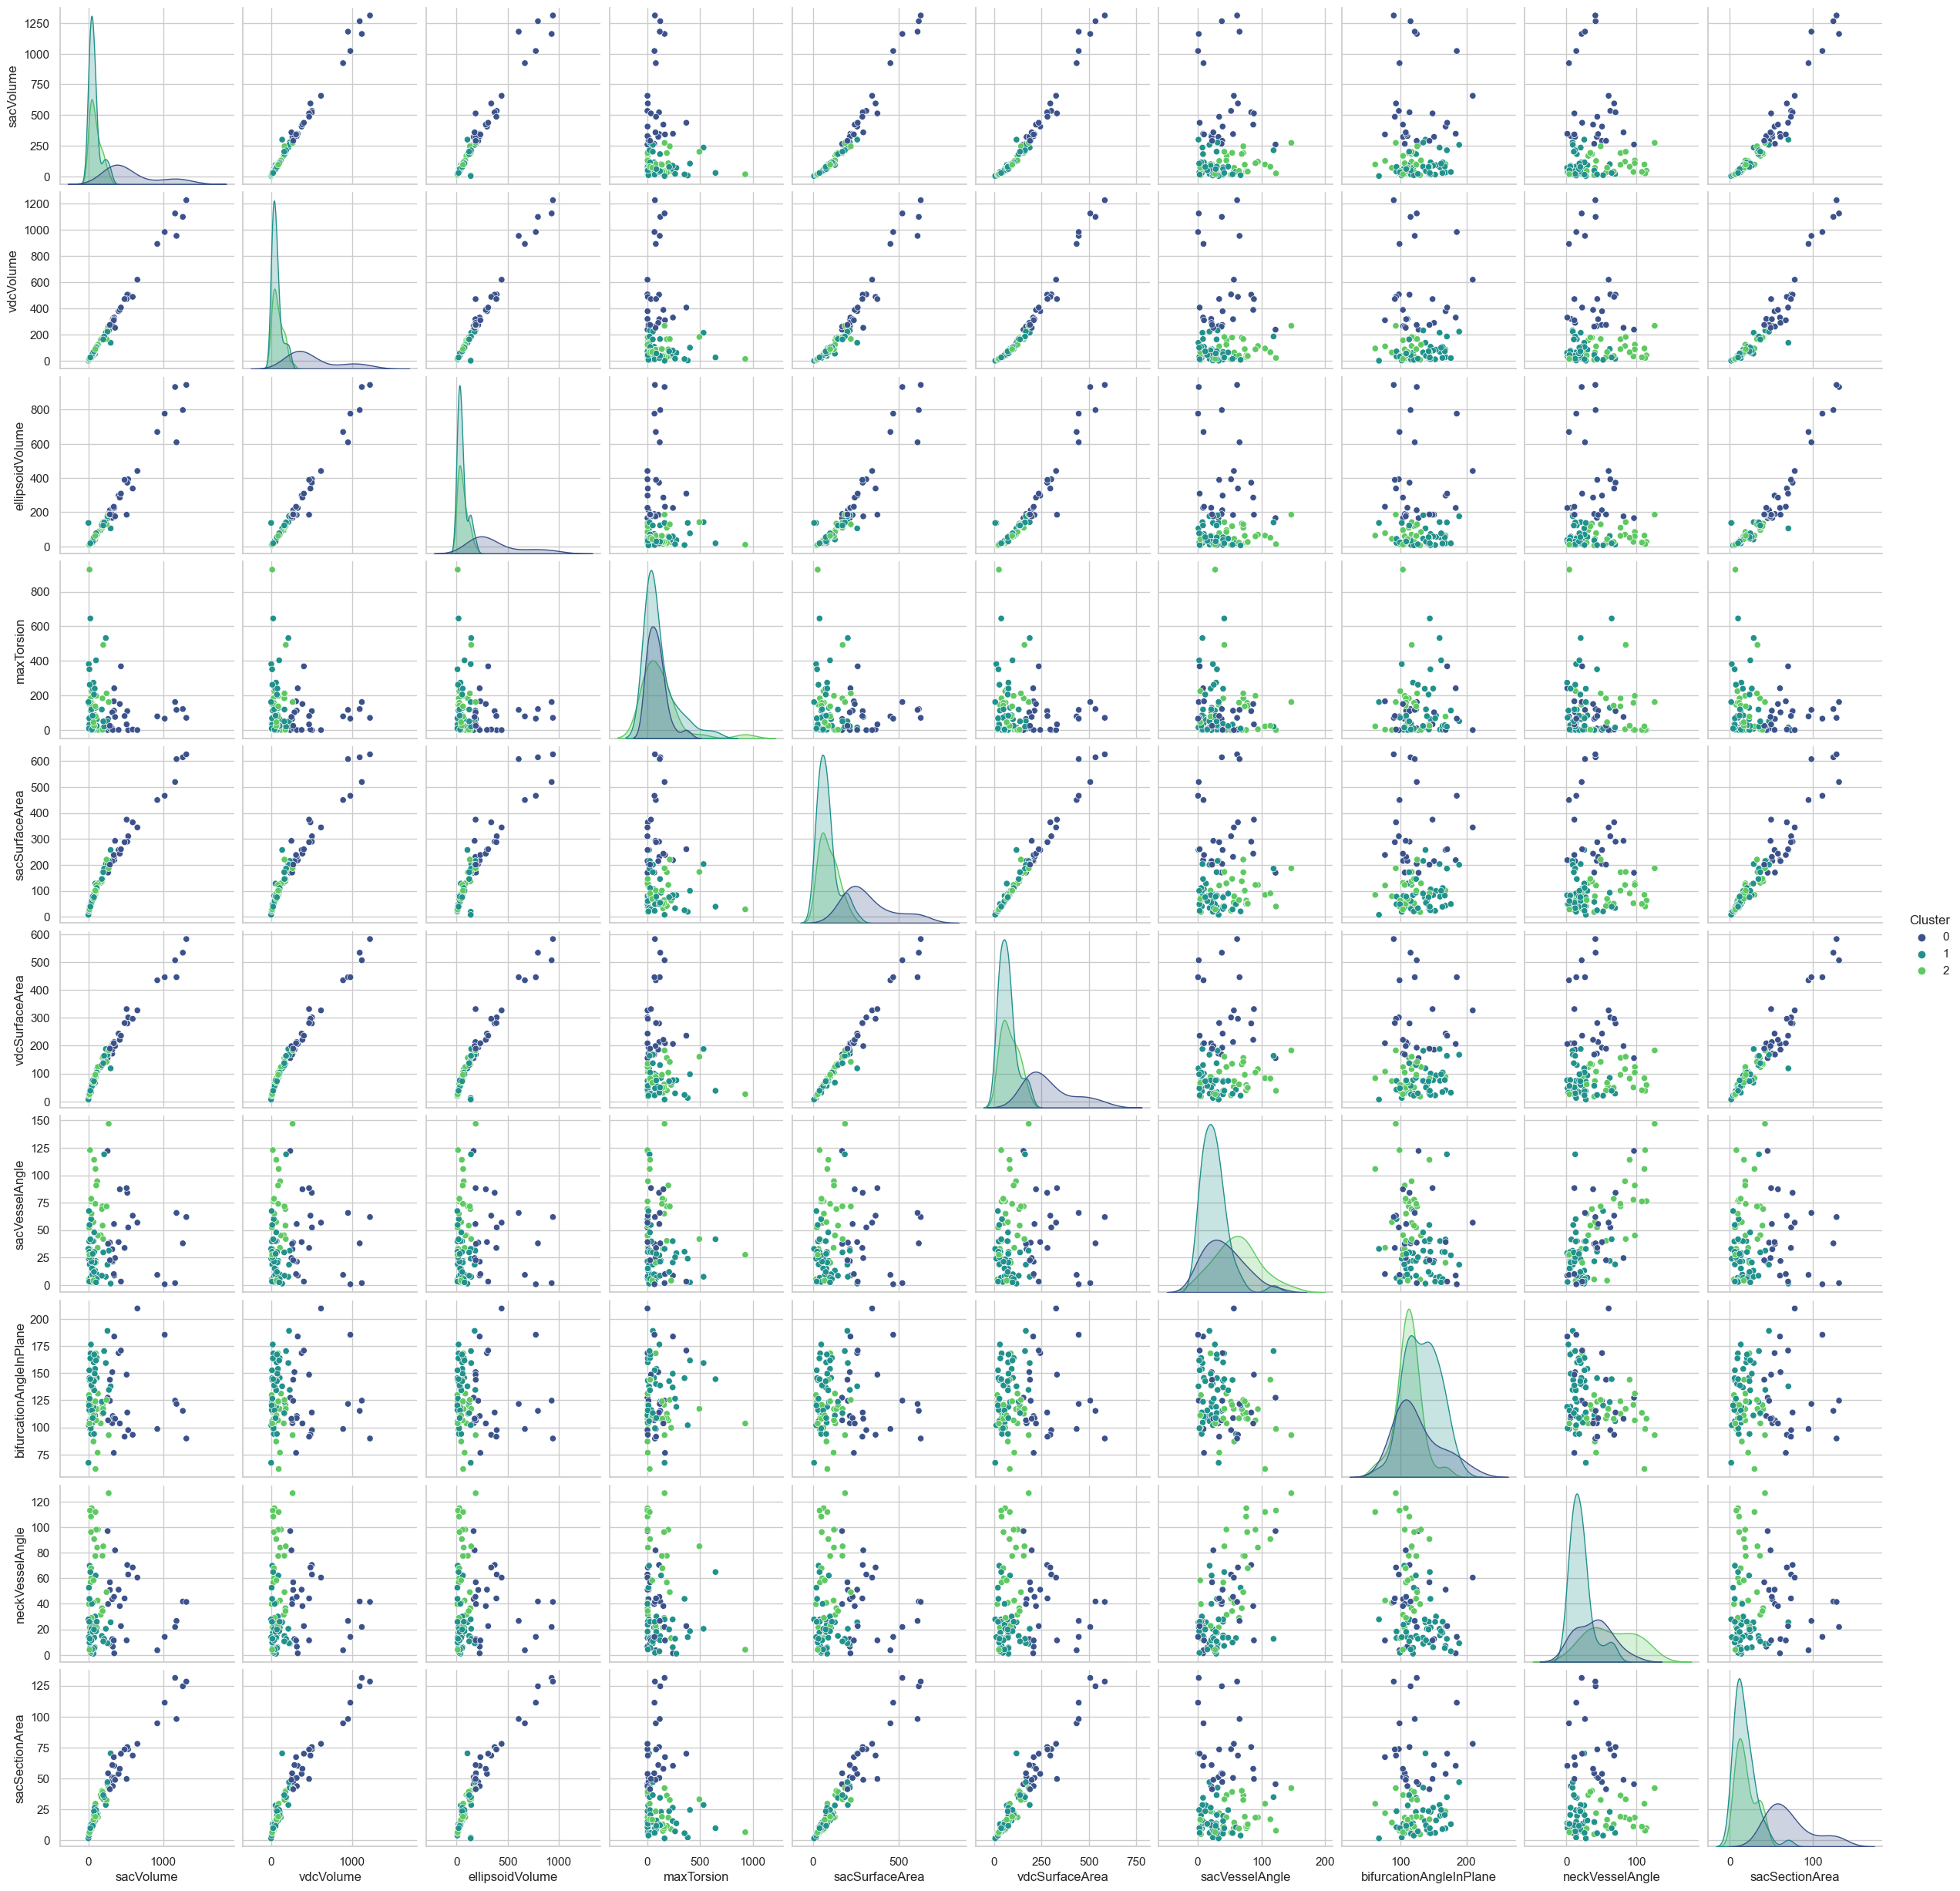

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the plotting style
sns.set(style="whitegrid")

# Scatter plot for PCA components with clusters
plt.figure(figsize=(16, 10))
scatter = plt.scatter(principal_df_with_rupture['PC1'], principal_df_with_rupture['PC2'], 
                      c=principal_df_with_rupture['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters Visualized in PCA-Reduced Feature Space (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Scatter plot for 3D PCA components with clusters
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_df_with_rupture['PC1'], principal_df_with_rupture['PC2'], 
                     principal_df_with_rupture['PC3'], c=principal_df_with_rupture['Cluster'], cmap='viridis', alpha=0.5)
ax.set_title('Clusters Visualized in 3D PCA-Reduced Feature Space')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

# Bar plot for rupture proportions in each cluster
rupture_proportions.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Ruptured Aneurysms within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Ruptured Aneurysms')
plt.show()

# Top characteristics based on variance
top_characteristics = ['sacVolume', 'vdcVolume', 'ellipsoidVolume', 'maxTorsion', 'sacSurfaceArea', 
                       'vdcSurfaceArea', 'sacVesselAngle', 'bifurcationAngleInPlane', 'neckVesselAngle', 'sacSectionArea']

# Generate box plots for the selected characteristics
plt.figure(figsize=(20, 25))
for i, feature in enumerate(top_characteristics, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=data_encoded_with_rupture)
    plt.title(f'Boxplot of {feature} by Cluster')

plt.tight_layout()
plt.show()

# Ensure all columns used in pairplot are numeric
pairplot_data = data_encoded_with_rupture[top_characteristics + ['Cluster']].copy()

# Convert all columns to numeric and drop any rows with invalid values
pairplot_data = pairplot_data.apply(pd.to_numeric, errors='coerce')
pairplot_data = pairplot_data.dropna()

# Convert Cluster to a categorical variable for the pair plot
pairplot_data['Cluster'] = pairplot_data['Cluster'].astype('category')

# Pair plot for the selected characteristics with clusters
sns.pairplot(pairplot_data, hue='Cluster', palette='viridis')
plt.show()


In [22]:
# Calculate the variance for each characteristic within each cluster
variance_summary = data_encoded_with_rupture.groupby('Cluster').var()

# Calculate the average variance for each characteristic across all clusters
average_variance = variance_summary.mean().sort_values(ascending=False)

# Select the top 10 characteristics with the highest average variance
top_characteristics = average_variance.head(10).index.tolist()

# Output the top characteristics
top_characteristics



['sacVolume',
 'vdcVolume',
 'ellipsoidVolume',
 'maxTorsion',
 'sacSurfaceArea',
 'vdcSurfaceArea',
 'sacVesselAngle',
 'bifurcationAngleInPlane',
 'neckVesselAngle',
 'sacSectionArea']

In [23]:
import pandas as pd
from scipy import stats

# Assuming the data is loaded into a DataFrame called data_encoded_with_rupture

# Perform ANOVA for each feature
features = data_encoded_with_rupture.columns.difference(['Cluster', 'ruptureStatus'])
anova_results = {}
for feature in features:
    anova_results[feature] = stats.f_oneway(
        data_encoded_with_rupture[data_encoded_with_rupture['Cluster'] == 0][feature],
        data_encoded_with_rupture[data_encoded_with_rupture['Cluster'] == 1][feature],
        data_encoded_with_rupture[data_encoded_with_rupture['Cluster'] == 2][feature]
    )

# Extract p-values and sort them
p_values = {feature: result.pvalue for feature, result in anova_results.items()}
sorted_p_values = dict(sorted(p_values.items(), key=lambda item: item[1]))

# Display the sorted p-values
print("Features sorted by p-value (ascending order):")
for feature, p_value in sorted_p_values.items():
    print(f"{feature}: p-value = {p_value}")

# Identify significant features (e.g., p-value < 0.05)
significant_features = [feature for feature, p_value in sorted_p_values.items() if p_value < 0.05]
print("\nSignificant features (p-value < 0.05):")
for feature in significant_features:
    print(f"{feature}: p-value = {sorted_p_values[feature]}")


Features sorted by p-value (ascending order):
aneurysmLocation_ICA: p-value = 3.1536914915289994e-29
meanCurvature: p-value = 4.11580834362656e-24
tortuosity: p-value = 3.0778339725542343e-23
sacSectionArea: p-value = 3.2372834347277954e-23
maxCurvature: p-value = 4.922392370738303e-23
ellipsoidMidSemiaxis: p-value = 9.903278322302643e-23
vdcSurfaceArea: p-value = 3.1191045909949935e-22
ellipsoidMinSemiaxis: p-value = 2.8568399198380798e-21
sacSurfaceArea: p-value = 1.0937705140170492e-20
maxRadius: p-value = 1.746267835002532e-20
vdcVolume: p-value = 2.809884591981343e-20
sacVolume: p-value = 9.617897808747378e-20
meanRadius: p-value = 2.0076013391530193e-19
ostiumSectionArea: p-value = 4.185184600408763e-18
ellipsoidVolume: p-value = 7.172412292430598e-18
ellipsoidMaxSemiaxis: p-value = 1.3789468768236526e-17
ostiumMinSize: p-value = 2.5258289034892906e-17
aneurysmType_TER: p-value = 2.6720388826096987e-17
ostiumSectionPerimeter: p-value = 5.426388778923464e-16
sacCenterlineLength: p

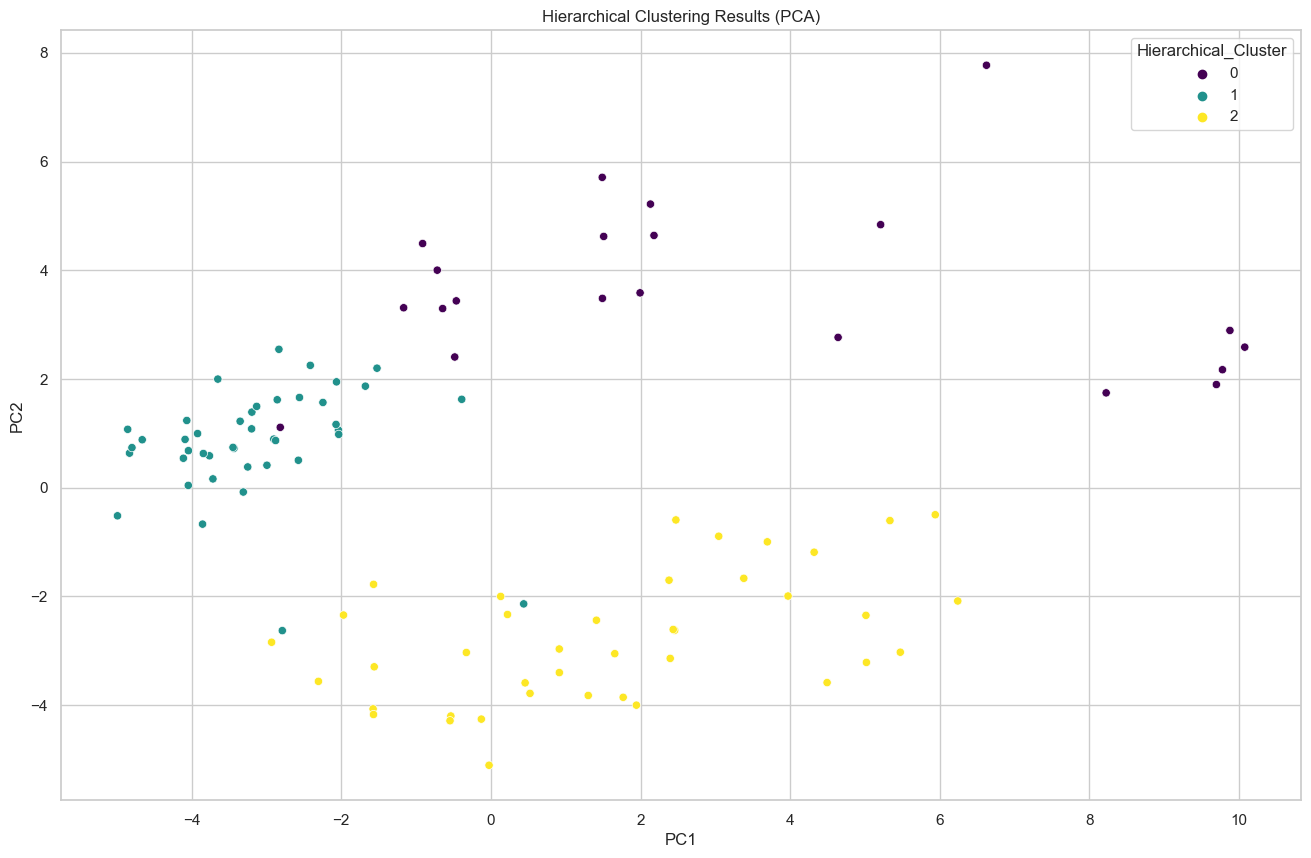

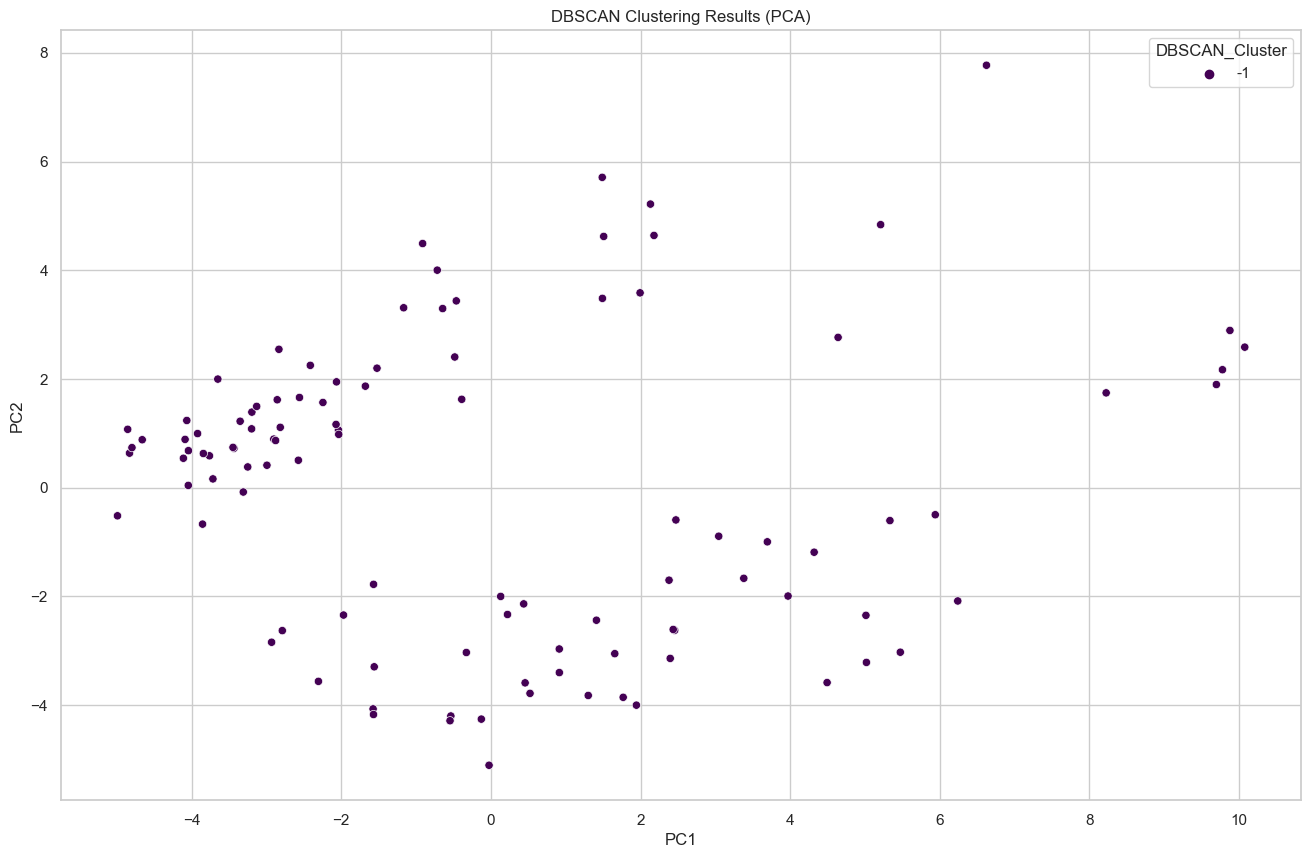

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


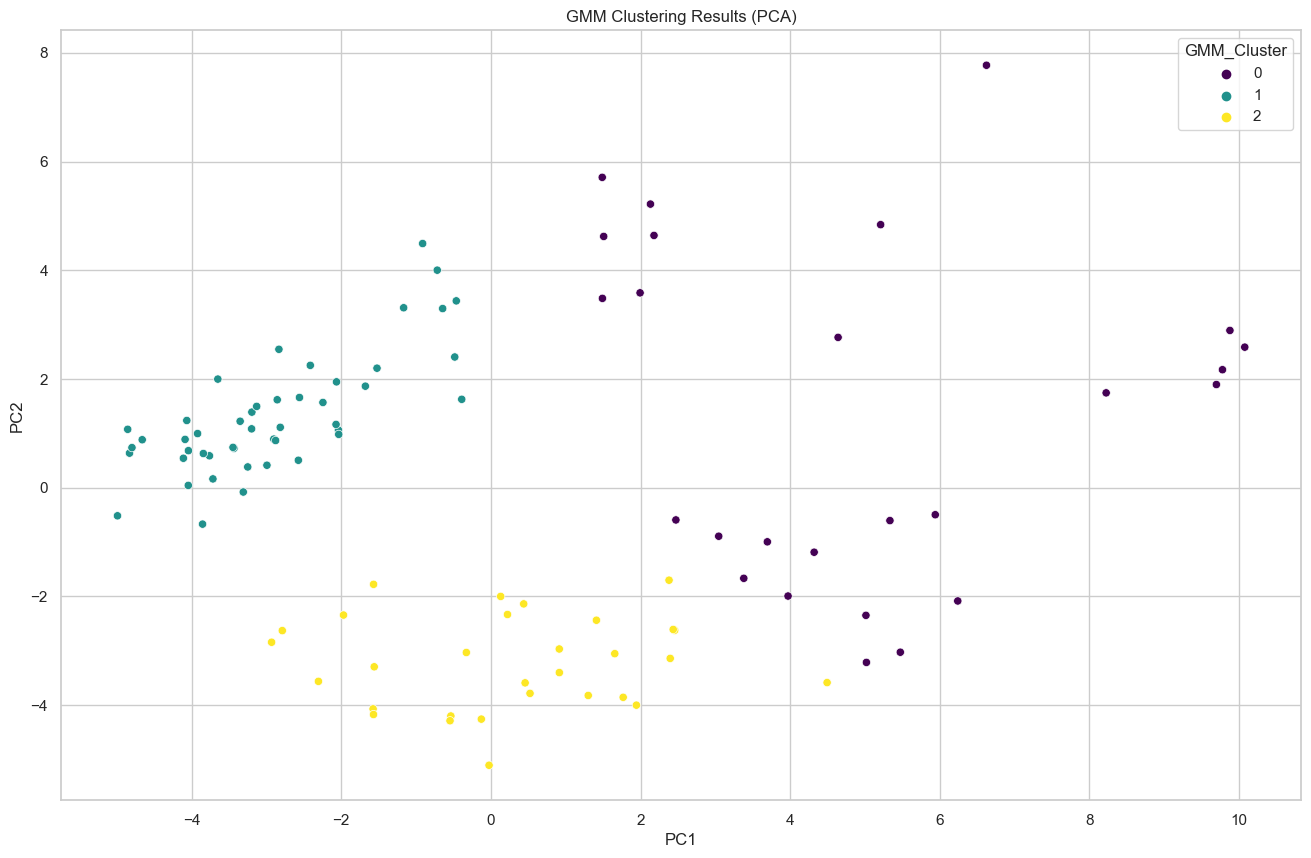

In [24]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical = hierarchical.fit_predict(data_scaled_with_rupture)
principal_df_with_rupture['Hierarchical_Cluster'] = clusters_hierarchical

plt.figure(figsize=(16, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=principal_df_with_rupture, palette='viridis')
plt.title('Hierarchical Clustering Results (PCA)')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(data_scaled_with_rupture)
principal_df_with_rupture['DBSCAN_Cluster'] = clusters_dbscan

plt.figure(figsize=(16, 10))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=principal_df_with_rupture, palette='viridis')
plt.title('DBSCAN Clustering Results (PCA)')
plt.show()

# Gaussian Mixture Models (GMM) Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(data_scaled_with_rupture)
principal_df_with_rupture['GMM_Cluster'] = clusters_gmm

plt.figure(figsize=(16, 10))
sns.scatterplot(x='PC1', y='PC2', hue='GMM_Cluster', data=principal_df_with_rupture, palette='viridis')
plt.title('GMM Clustering Results (PCA)')
plt.show()



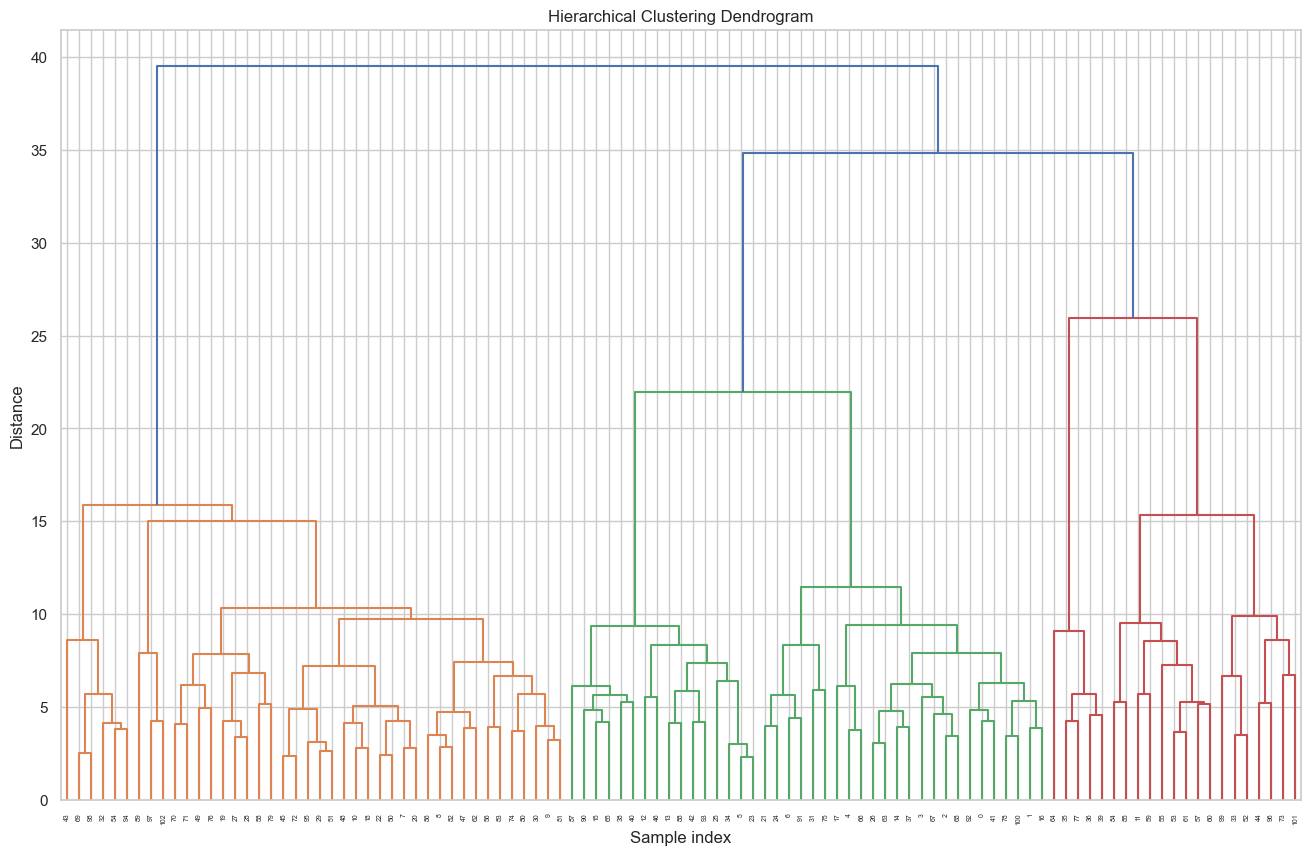

In [25]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


# Dendrogram
plt.figure(figsize=(16, 10))
Z = linkage(data_scaled_with_rupture, 'ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Assuming data_scaled_with_rupture is already defined and preprocessed
# Define clustering methods
clustering_methods = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=3, random_state=42)
}

# Fit and predict clusters for each method
cluster_labels = {}
for name, method in clustering_methods.items():
    if name == 'GMM':
        cluster_labels[name] = method.fit_predict(data_scaled_with_rupture)
    else:
        cluster_labels[name] = method.fit(data_scaled_with_rupture).labels_

# Silhouette Analysis
for name, labels in cluster_labels.items():
    n_labels = len(set(labels))
    if n_labels > 1:
        silhouette_avg = silhouette_score(data_scaled_with_rupture, labels)
        print(f'Silhouette Score for {name}: {silhouette_avg}')
    else:
        print(f'Silhouette Score for {name}: Not applicable (only {n_labels} cluster)')

# Compute Davies-Bouldin Index and Calinski-Harabasz Index
for name, labels in cluster_labels.items():
    n_labels = len(set(labels))
    if n_labels > 1:
        db_index = davies_bouldin_score(data_scaled_with_rupture, labels)
        ch_index = calinski_harabasz_score(data_scaled_with_rupture, labels)
        print(f'Davies-Bouldin Index for {name}: {db_index}')
        print(f'Calinski-Harabasz Index for {name}: {ch_index}')
    else:
        print(f'Davies-Bouldin Index for {name}: Not applicable (only {n_labels} cluster)')
        print(f'Calinski-Harabasz Index for {name}: Not applicable (only {n_labels} cluster)')

# Add silhouette scores to the principal component dataframe if applicable
pca_clusters = principal_df_with_rupture['Cluster']
n_pca_clusters = len(set(pca_clusters))
if n_pca_clusters > 1:
    principal_df_with_rupture['Silhouette'] = silhouette_score(data_scaled_with_rupture, pca_clusters)
    print(f'Silhouette Score for PCA Clustering: {principal_df_with_rupture["Silhouette"].mean()}')
else:
    print(f'Silhouette Score for PCA Clustering: Not applicable (only {n_pca_clusters} cluster)')


Silhouette Score for KMeans: 0.21017856794301368
Silhouette Score for Agglomerative: 0.21667705274598054
Silhouette Score for DBSCAN: Not applicable (only 1 cluster)
Silhouette Score for GMM: 0.21017856794301368
Davies-Bouldin Index for KMeans: 1.5279041191825906
Calinski-Harabasz Index for KMeans: 31.158292178310734
Davies-Bouldin Index for Agglomerative: 1.5684569458626878
Calinski-Harabasz Index for Agglomerative: 27.43599806401967
Davies-Bouldin Index for DBSCAN: Not applicable (only 1 cluster)
Calinski-Harabasz Index for DBSCAN: Not applicable (only 1 cluster)
Davies-Bouldin Index for GMM: 1.5279041191825906
Calinski-Harabasz Index for GMM: 31.158292178310734
Silhouette Score for PCA Clustering: 0.21017856794301368


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


    Linkage  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
0      ward          0.283774              1.313407                33.469803
1  complete          0.186278              2.100599                31.464497
2   average          0.287045              1.048808                28.710576
3    single          0.097396              0.689593                 1.985953


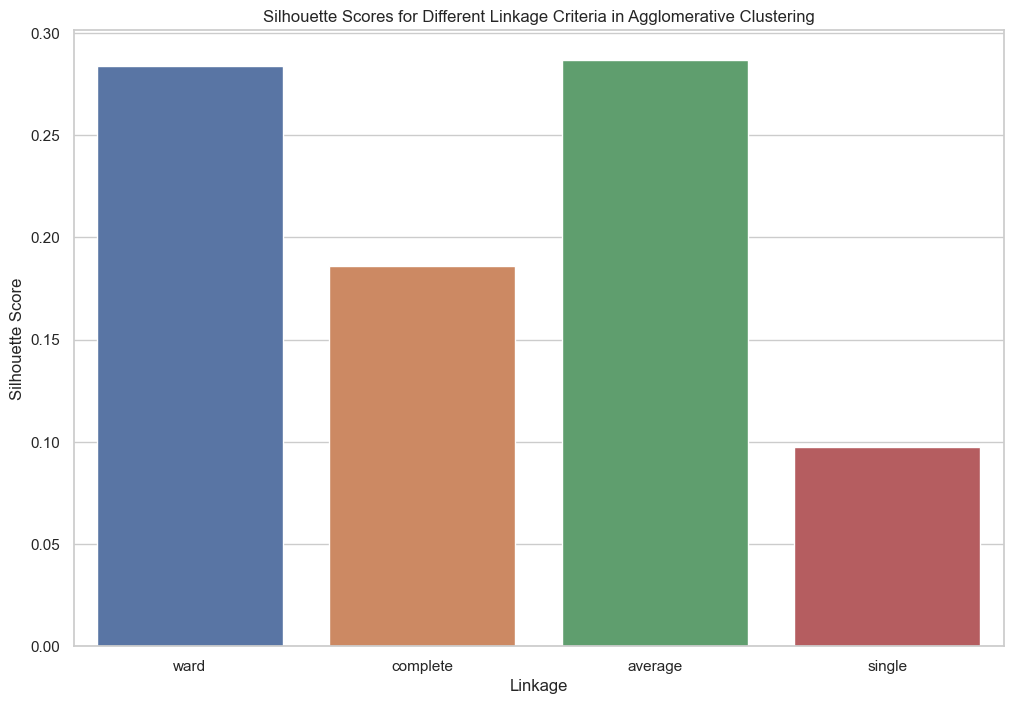

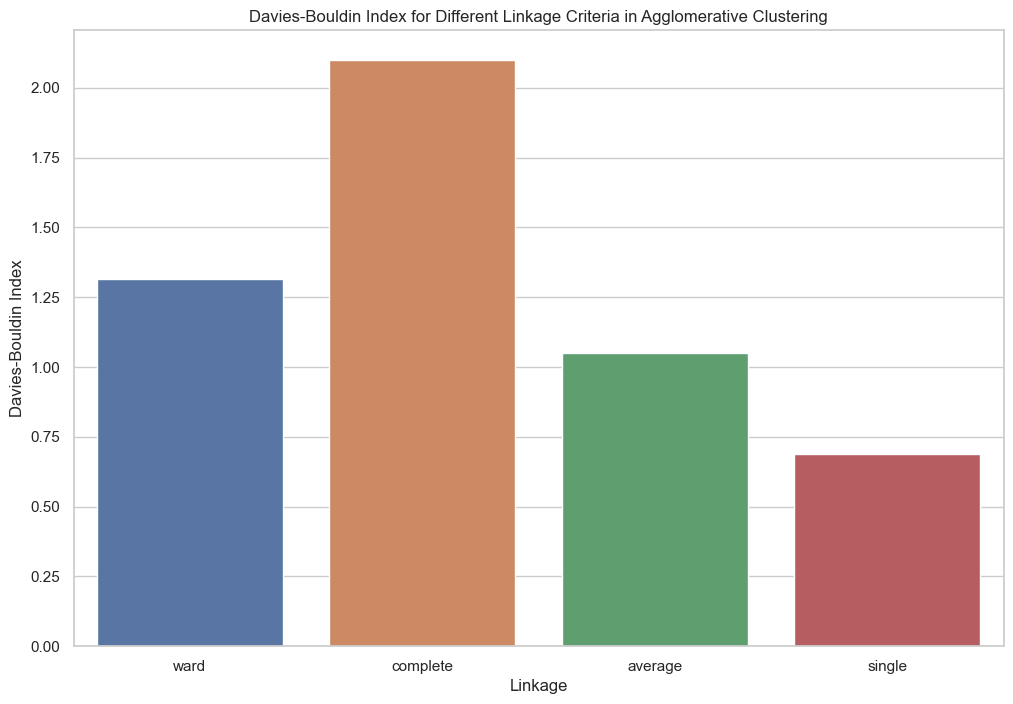

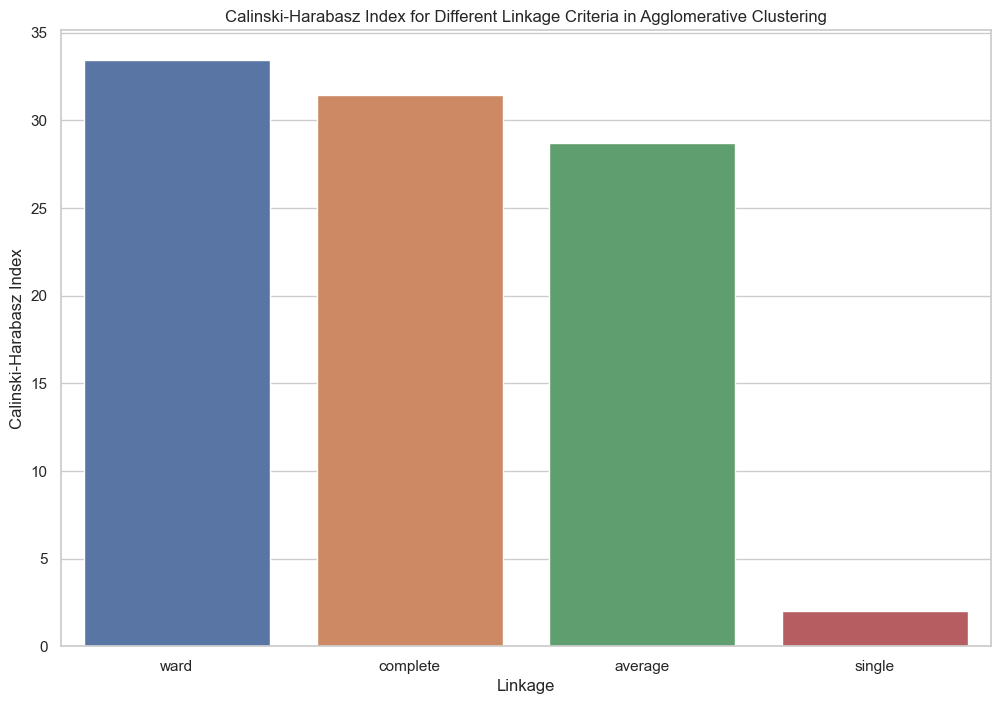

In [11]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define linkage criteria to test
linkage_criteria = ['ward', 'complete', 'average', 'single']

# Store results
results = []

for linkage in linkage_criteria:
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    clusters_agg = agg_clustering.fit_predict(data_scaled_with_rupture)
    
    silhouette_avg = silhouette_score(data_scaled_with_rupture, clusters_agg)
    db_index = davies_bouldin_score(data_scaled_with_rupture, clusters_agg)
    ch_index = calinski_harabasz_score(data_scaled_with_rupture, clusters_agg)
    
    results.append({
        'Linkage': linkage,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': db_index,
        'Calinski-Harabasz Index': ch_index
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Linkage', y='Silhouette Score', data=results_df)
plt.title('Silhouette Scores for Different Linkage Criteria in Agglomerative Clustering')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Linkage', y='Davies-Bouldin Index', data=results_df)
plt.title('Davies-Bouldin Index for Different Linkage Criteria in Agglomerative Clustering')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Linkage', y='Calinski-Harabasz Index', data=results_df)
plt.title('Calinski-Harabasz Index for Different Linkage Criteria in Agglomerative Clustering')
plt.show()


In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Parameter ranges to test
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(3, 10)

# Store results
dbscan_results = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(data_scaled_with_rupture)
        
        # Check if more than one cluster is formed
        if len(set(clusters_dbscan)) > 1:
            silhouette_avg = silhouette_score(data_scaled_with_rupture, clusters_dbscan)
            db_index = davies_bouldin_score(data_scaled_with_rupture, clusters_dbscan)
            ch_index = calinski_harabasz_score(data_scaled_with_rupture, clusters_dbscan)
            
            dbscan_results.append({
                'eps': eps,
                'min_samples': min_samples,
                'Silhouette Score': silhouette_avg,
                'Davies-Bouldin Index': db_index,
                'Calinski-Harabasz Index': ch_index
            })

# Display results
dbscan_results_df = pd.DataFrame(dbscan_results)
print(dbscan_results_df)

# Visualize the results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='eps', y='Silhouette Score', hue='min_samples', data=dbscan_results_df, palette='viridis', s=100)
plt.title('Silhouette Scores for Different DBSCAN Parameters')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='eps', y='Davies-Bouldin Index', hue='min_samples', data=dbscan_results_df, palette='viridis', s=100)
plt.title('Davies-Bouldin Index for Different DBSCAN Parameters')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='eps', y='Calinski-Harabasz Index', hue='min_samples', data=dbscan_results_df, palette='viridis', s=100)
plt.title('Calinski-Harabasz Index for Different DBSCAN Parameters')
plt.show()


Empty DataFrame
Columns: []
Index: []


ValueError: Could not interpret value `eps` for parameter `x`

<Figure size 1200x800 with 0 Axes>